In [1]:
!pip install pyforest 
from pyforest import * 


  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13716 sha256=4bd36a7a588990cb075d341d541c79ad6668f3973434d1e7e14b110074b50f5e
  Stored in directory: /home/vikpy/.cache/pip/wheels/72/b6/6c/b593d021f7e83f481c5208bc23df0084bcfbeb5b141352b882
Successfully built pyforest


data: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [3]:
df = pd.read_csv("winequality-red.csv",sep=';')
df.head()

<IPython.core.display.Javascript object>

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


let us understand the target values 

In [6]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

We can map these values to values from 0 to 5 using label encoder 

In [15]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df.quality = enc.fit_transform(df.quality)
df.quality.unique()

array([2, 3, 4, 1, 5, 0])

In [17]:
df.shape[0]

1599

In [22]:
def tts(df, train_fraction=0.8):
    df = df.sample(frac=1).reset_index(drop=True)
    train_size = int(np.ceil(train_fraction*df.shape[0]))
    train = df.head(train_size)
    test = df.tail(df.shape[0] - train_size)
    return train, test

df_train, df_test = tts(df)

<IPython.core.display.Javascript object>

1280


In [23]:
df_train.shape, df_test.shape

((1280, 12), (319, 12))

In [24]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=3)

cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'       
       ]

clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [25]:
train_predictions = clf.predict(df_train[cols])

test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(
   df_train.quality, train_predictions
)

test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)


In [26]:
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [28]:
%matplotlib inline

In [30]:
train_accuracies = [0.5]
test_accuracies = [0.5]

In [32]:
for depth in range(1,25):

    clf = tree.DecisionTreeClassifier(max_depth=depth)

    cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'       
       ]

    clf.fit(df_train[cols], df_train.quality)


    train_predictions = clf.predict(df_train[cols])

    test_predictions = clf.predict(df_test[cols])

    train_accuracy = metrics.accuracy_score(
       df_train.quality, train_predictions
    )

    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    

/home/vikpy/miniconda3/envs/ml/lib/python3.7/site-packages/pyforest/__init__.py:5: MatplotlibDeprecationWarning: Unrecognized location 'auto'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  install_extensions,


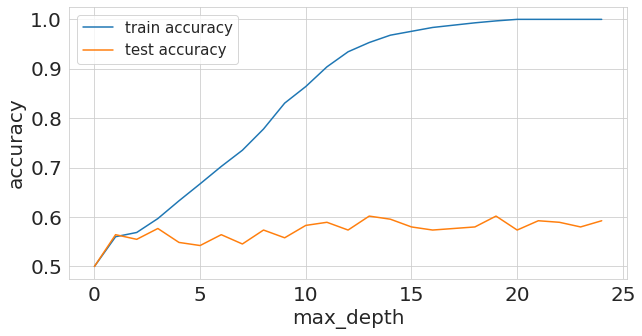

In [33]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="auto", prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

Trying to eliminate the bias using cross validation 

In [37]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection

# Training data is in a CSV file called train.csv
train = df_train
# we create a new column called kfold and fill it with -1
train["kfold"] = -1
# the next step is to randomize the rows of the data
train = train.sample(frac=1).reset_index(drop=True)
# initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)
# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=train)):
    train.loc[val_, 'kfold'] = fold
# save the new csv with kfold column    
train.kfold.unique()    

array([0, 1, 2, 3, 4])

k fold randomizes the data, hence if the y is skewed k fold validation will not be of any use. Hence to improve on this we used stratified k fold. What this does is that instead of sampling it 

Text(0, 0.5, 'count')

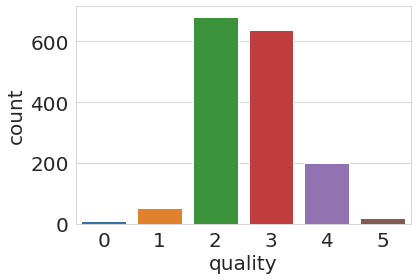

In [42]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [41]:
# Training data is in a CSV file called train.csv
train = df_train
# we create a new column called kfold and fill it with -1
train["kfold"] = -1
# the next step is to randomize the rows of the data
train = train.sample(frac=1).reset_index(drop=True)
# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)
# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=train.drop("quality", axis=1), y=train.quality)):
    train.loc[val_, 'kfold'] = fold
# save the new csv with kfold column    
train.groupby("kfold").count()    

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
kfold,,,,,,,,,,,,
0,256,256,256,256,256,256,256,256,256,256,256,256
1,256,256,256,256,256,256,256,256,256,256,256,256
2,256,256,256,256,256,256,256,256,256,256,256,256
3,256,256,256,256,256,256,256,256,256,256,256,256
4,256,256,256,256,256,256,256,256,256,256,256,256
